In [2]:
%load_ext autoreload
%autoreload 2

import copy
import json
import sys
from urllib.request import urlretrieve

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from blur_face.detection import Detector
sys.path.append('..')
from blur_face.blurring import  ImageBlur, PixelBlur


annotation_path = '/home/michal/studia/ZPI/data/face_detection.json'
with open(annotation_path, 'r') as file:
    lines = file.readlines()
    annotations = [json.loads(a) for a in lines]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def download_sample(annotations, sample_size=10):
    sample_indxs = np.random.choice(np.arange(len(annotations)), sample_size, replace=False)
    sample = copy.deepcopy([annotations[i] for i in sample_indxs])
    paths = [urlretrieve(s['content'])[0] for s in sample]
    
    for s, path in zip(sample, paths):
        image = Image.open(path).convert('RGB')
        s['image'] = image
        
    return sample
    
sample = download_sample(annotations)

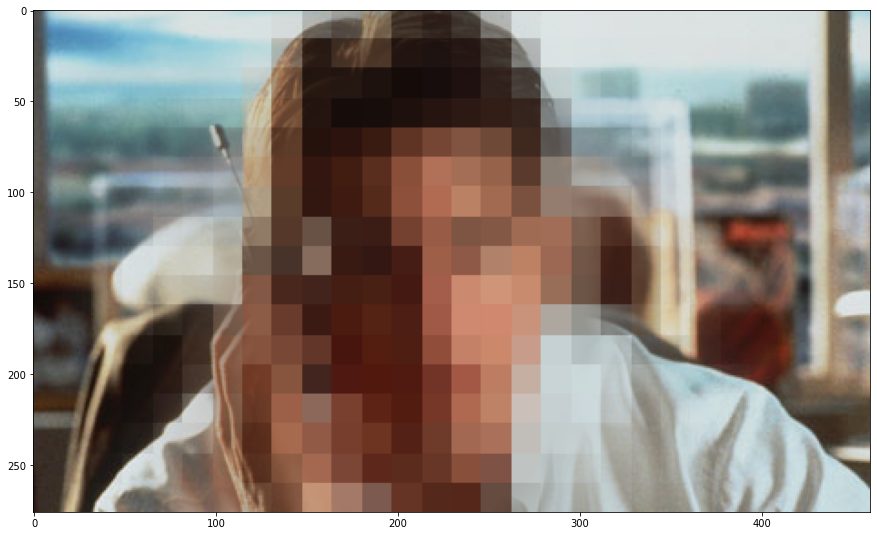

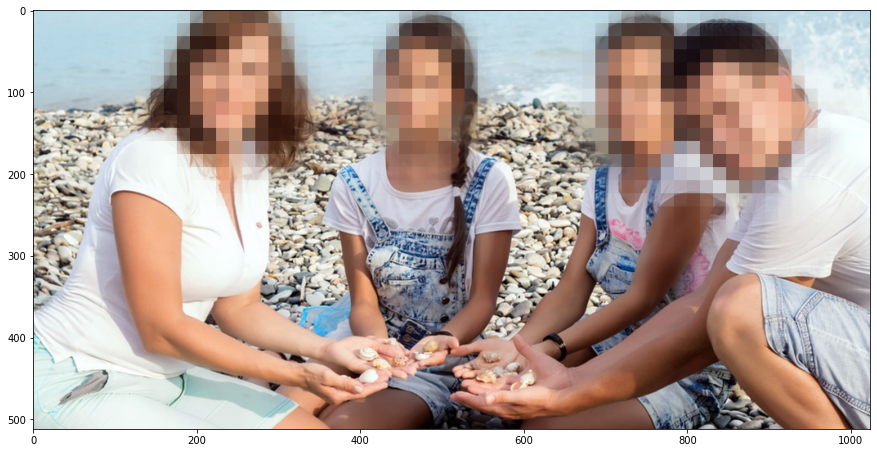

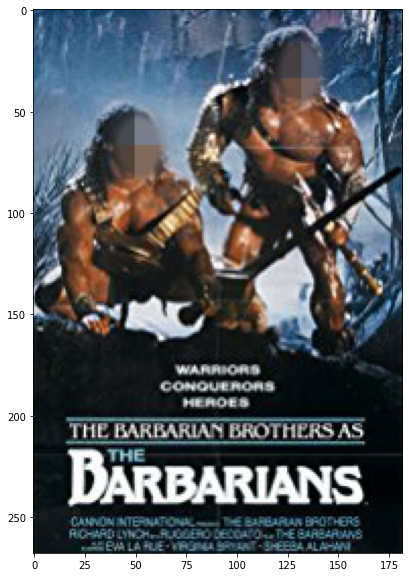

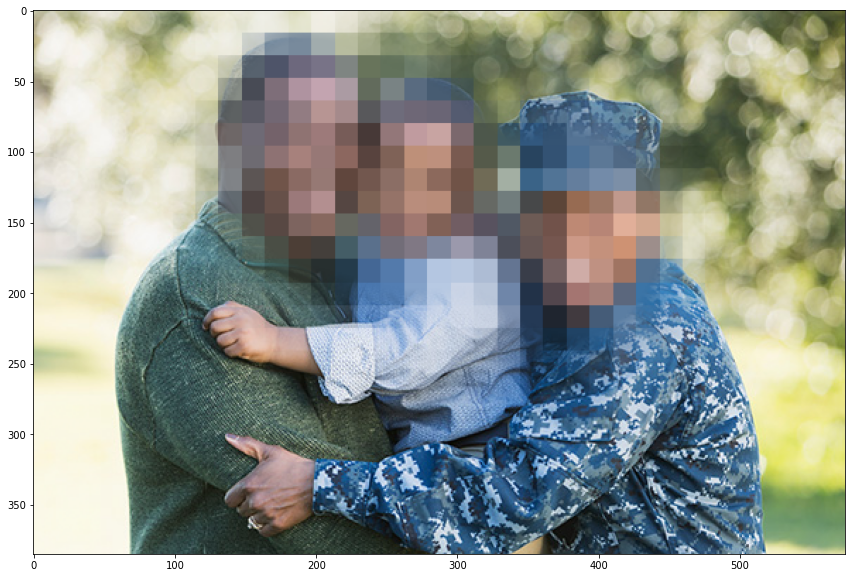

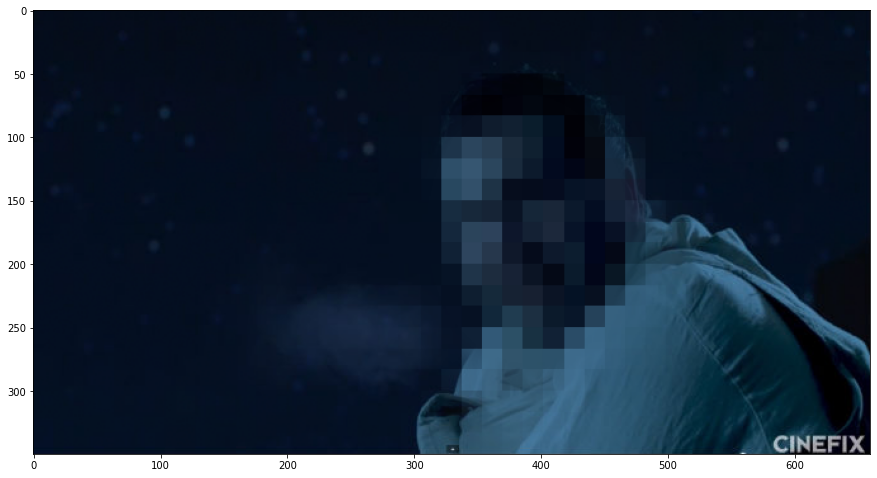

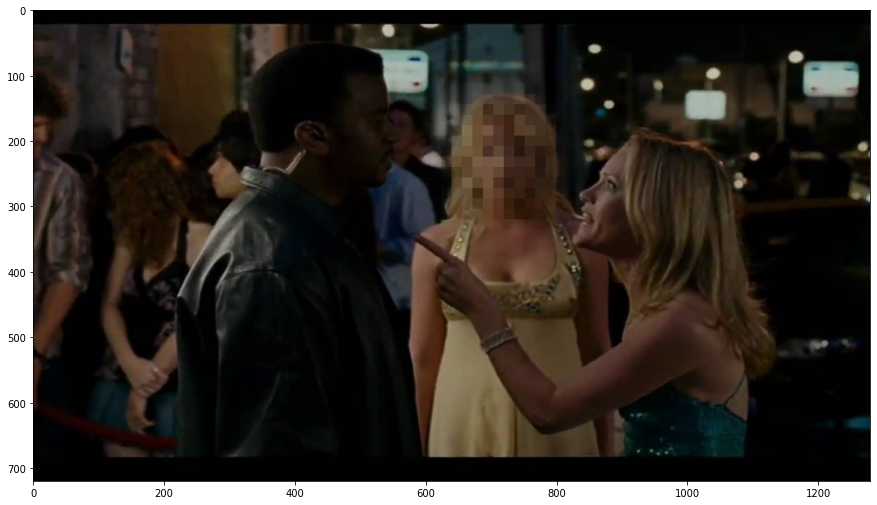

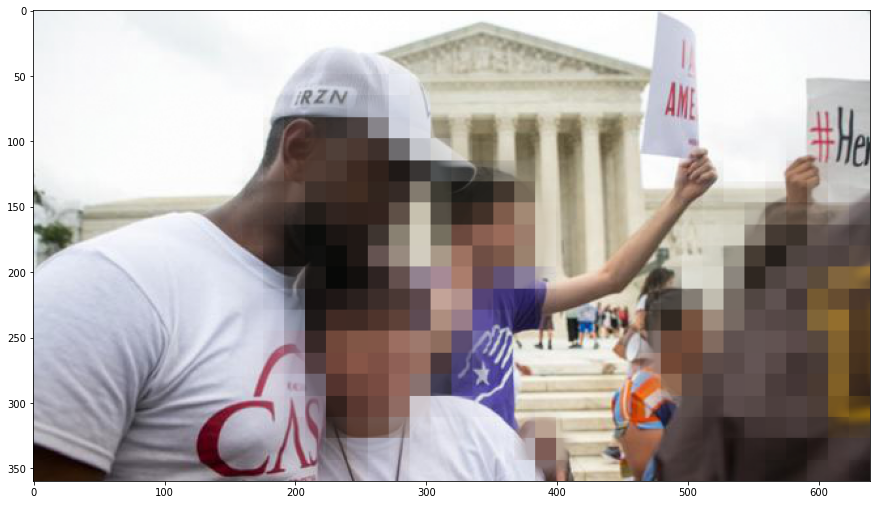

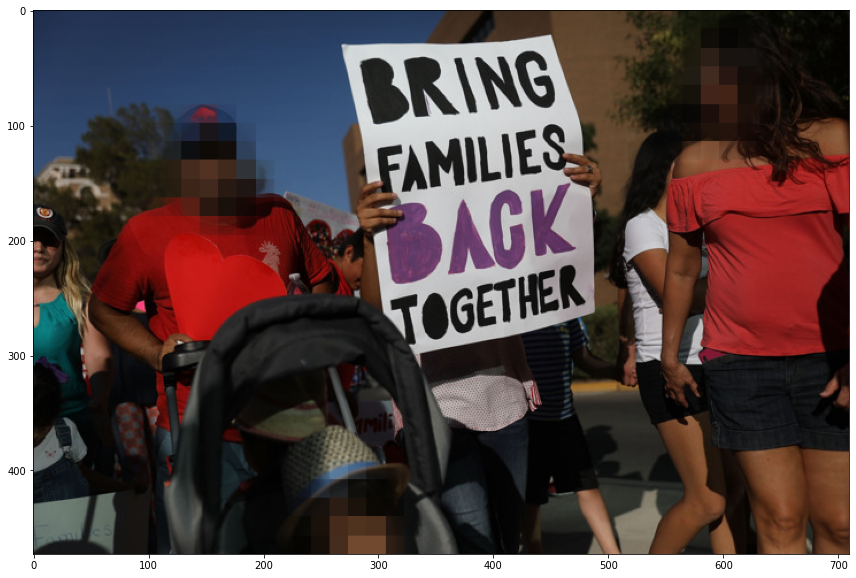

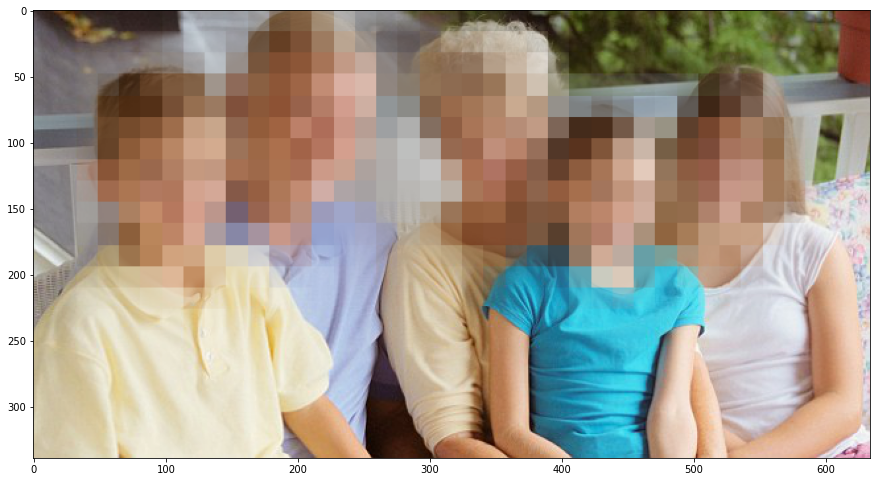

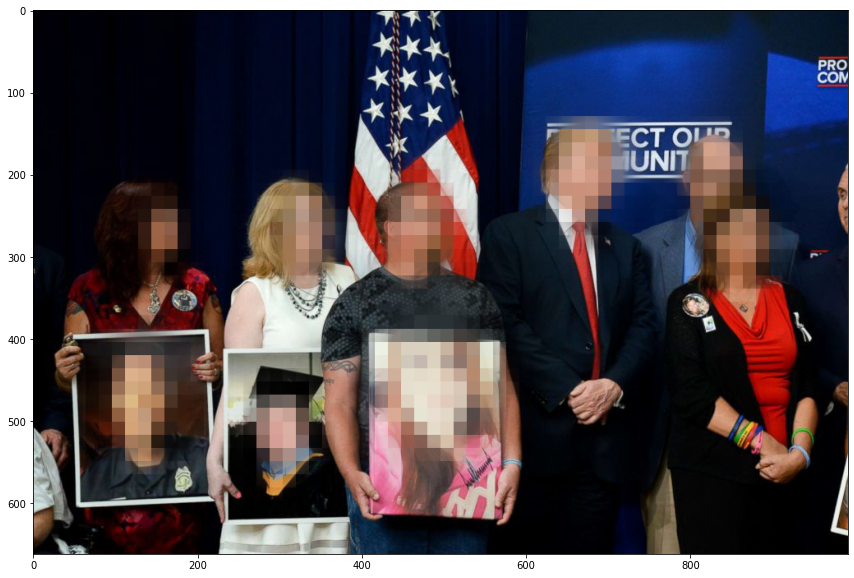

In [5]:
blur_type = PixelBlur(16)
image_blur = ImageBlur(
    blur_type, 2, 2.5
)

detector = Detector()
for s in sample:
    image = s['image']
    boxes = detector.detect(image)
    image_blurred = image_blur.blur(image, boxes)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(image_blurred)
    plt.show()
    
    
